<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/Unsupervised%20Learning/Unsupervised%20Learning%20in%20Python/3%20Decorrelating%20your%20data%20and%20dimension%20reduction/3_Decorrelating_your_data_and_dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decorrelating your data and dimension reduction

Dimension reduction summarizes a dataset using its common occuring patterns. In this chapter, you'll learn about the most fundamental of dimension reduction techniques, "Principal Component Analysis" ("PCA"). PCA is often used before supervised learning to improve model performance and generalization. It can also be useful for unsupervised learning. For example, you'll employ a variant of PCA will allow you to cluster Wikipedia articles by their content!

# 1. Visualizing the PCA transformation
In the next two chapters you'll learn techniques for dimension reduction.

2. Dimension reduction
Dimension reduction finds patterns in data, and uses these patterns to re-express it in a compressed form. This makes subsequent computation with the data much more efficient, and this can be a big deal in a world of big datasets. However, the most important function of dimension reduction is to reduce a dataset to its "bare bones", discarding noisy features that cause big problems for supervised learning tasks like regression and classification. In many real-world applications, it's dimension reduction that makes prediction possible.

3. Principal Component Analysis
In this chapter, you'll learn about the most fundamental of dimension reduction techniques. It's called "Principal Component Analysis", or "PCA" for short. PCA performs dimension reduction in two steps, and the first one, called "de-correlation", doesn't change the dimension of the data at all. It's this first step that we'll focus on in this video.

4. PCA aligns data with axes
In this first step, PCA rotates the samples so that they are aligned with the coordinate axes. In fact, it does more than this: PCA also shifts the samples so that they have mean zero. These scatter plots show the effect of PCA applied to two features of the wine dataset. Notice that no information is lost - this is true no matter how many features your dataset has. You'll practice visualizing this transformation in the exercises.

5. PCA follows the fit/transform pattern
scikit-learn has an implementation of PCA, and it has fit and transform methods just like StandardScaler. The fit method learns how to shift and how to rotate the samples, but doesn't actually change them. The transform method, on the other hand, applies the transformation that fit learned. In particular, the transform method can be applied to new, unseen samples.

6. Using scikit-learn PCA
Let's see PCA in action on the some features of the wine dataset. Firstly, import PCA. Now create a PCA object, and fit it to the samples. Then use the fit PCA object to transform the samples. This returns a new array of transformed samples.

7. PCA features
This new array has the same number of rows and columns as the original sample array. In particular, there is one row for each transformed sample. The columns of the new array correspond to "PCA features", just as the original features corresponded to columns of the original array.

8. PCA features are not correlated
It is often the case that the features of a dataset are correlated. This is the case with many of the features of the wine dataset, for instance. However, PCA, due to the rotation it performs, "de-correlates" the data, in the sense that the columns of the transformed array are not linearly correlated.

9. Pearson correlation
Linear correlation can be measured with the Pearson correlation. It takes values between -1 and 1, where larger values indicate a stronger correlation, and 0 indicates no linear correlation. Here are some examples of features with varying degrees of correlation.

10. Principal components
Finally, PCA is called "principal component analysis" because it learns the "principal components" of the data. These are the directions in which the samples vary the most, depicted here in red. It is the principal components that PCA aligns with the coordinate axes.

11. Principal components
After a PCA model has been fit, the principal components are available as the components attribute. This is numpy array with one row for each principal component.

12. Let's practice!
You've met several new ideas in this video. Let's put them into practice!

# Correlated data in nature
You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

Instructions

1. Import:
 
 - matplotlib.pyplot as plt.
 - pearsonr from scipy.stats.

2. Assign column 0 of grains to width and column 1 of grains to length.

3. Make a scatter plot with width on the x-axis and length on the y-axis.

4. Use the pearsonr() function to calculate the Pearson correlation of width and length.

In [ ]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

'''
<script.py> output:
    0.8604149377143466
'''

**Conclusion**

Great work! As you would expect, the width and length of the grain samples are highly correlated.

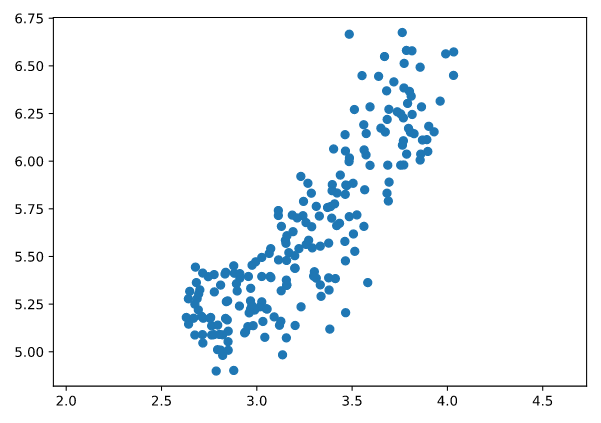

# Decorrelating the grain measurements with PCA
You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

Instructions

1. Import PCA from sklearn.decomposition.

2. Create an instance of PCA called model.

3. Use the .fit_transform() method of model to apply the PCA transformation to grains. Assign the result to pca_features.

4. The subsequent code to extract, plot, and compute the Pearson correlation of the first two columns pca_features has been written for you, so hit 'Submit Answer' to see the result!

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

'''
<script.py> output:
    2.5478751053409354e-17
'''

**Conclusion**

Excellent! You've successfully decorrelated the grain measurements with PCA!

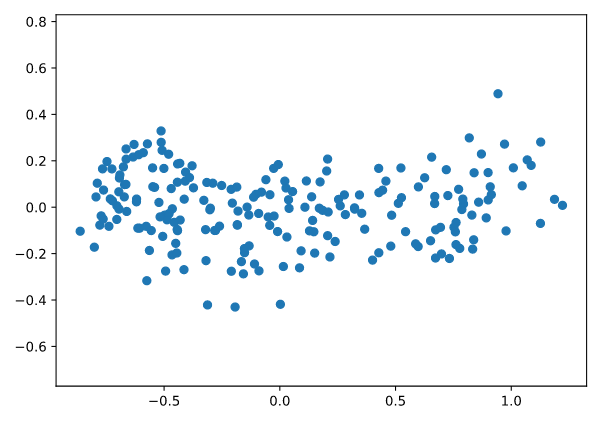


# Principal components
Below are three scatter plots of the same point cloud. Each scatter plot shows a different set of axes (in red). In which of the plots could the axes represent the principal components of the point cloud?

Recall that the principal components are the directions along which the the data varies.

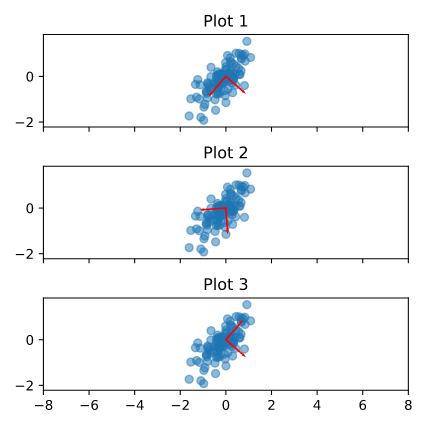

Wrong Answers

- None of them.

- Plot 2.

Correct Answer

- Both plot 1 and plot 3.

Conclusion

Well done! You've correctly inferred that the principal components have to align with the axes of the point cloud. This happens in both plot 1 and plot 3.

# 1. Intrinsic dimension

2. Intrinsic dimension of a flight path
Consider this dataset with 2 features: latitude and longitude. These two features might track the flight of an airplane, for example. This dataset is 2-dimensional, yet it turns out that it can be closely approximated using only one feature: the displacement along the flight path. This dataset is intrinsically one-dimensional.

3. Intrinsic dimension
The intrinsic dimension of a dataset is the number of features required to approximate it. The intrinsic dimension informs dimension reduction, because it tells us how much a dataset can be compressed. In this video, you'll gain a solid understanding of the intrinsic dimension, and be able to use PCA to identify it in real-world datasets that have thousands of features.

4. Versicolor dataset
To better illustrate the intrinsic dimension, let's consider an example dataset containing only some of the samples from the iris dataset. Specifically, let's take three measurements from the iris versicolor samples: sepal length, sepal width, and petal width. So each sample is represented as a point in 3-dimensional space.

5. Versicolor dataset has intrinsic dimension 2
However, if we make a 3d scatter plot of the samples, we see that they all lie very close to a flat, 2-dimensional sheet. This means that the data can be approximated by using only two coordinates, without losing much information. So this dataset has intrinsic dimension 2.

6. PCA identifies intrinsic dimension
But scatter plots are only possible if there are 3 features or less. So how can the intrinsic dimension be identified, even if there are many features? This is where PCA is really helpful. The intrinsic dimension can be identified by counting the PCA features that have high variance. To see how, let's see what happens when PCA is applied to the dataset of versicolor samples.

7. PCA of the versicolor samples
PCA rotates and shifts the samples to align them with the coordinate axes. This expresses the samples using three PCA features.

8. PCA features are ordered by variance descending
The PCA features are in a special order. Here is a bar graph showing the variance of each of the PCA features. As you can see, each PCA feature has less variance than the last, and in this case the last PCA feature has very low variance. This agrees with the scatter plot of the PCA features, where the samples don't vary much in the vertical direction. In the other two directions, however, the variance is apparent.

9. Variance and intrinsic dimension
The intrinsic dimension is the number of PCA features that have significant variance. In our example, only the first two PCA features have significant variance. So this dataset has intrinsic dimension 2, which agrees with what we observed when inspecting the scatter plot.

10. Plotting the variances of PCA features
Let's see how to plot the variances of the PCA features in practice. Firstly, make the necessary imports. Then create a PCA model, and fit it to the samples. Now create a range enumerating the PCA features,

11. Plotting the variances of PCA features
and make a bar plot of the variances; the variances are available as the explained_variance attribute of the PCA model.

12. Intrinsic dimension can be ambiguous
The intrinsic dimension is a useful idea that helps to guide dimension reduction. However, it is not always unambiguous. Here is a graph of the variances of the PCA features for the wine dataset. We could argue for an intrinsic dimension of 2, of 3, or even more, depending upon the threshold you chose.

13. Let's practice!
In the next video, you'll learn to use the intrinsic dimension for dimension reduction. But for now, let's get some practice discovering the intrinsic dimension of some real-world datasets!

# The first principal component

The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

The array grains gives the length and width of the grain samples. PyPlot (plt) and PCA have already been imported for you.

Instructions

1. Make a scatter plot of the grain measurements. This has been done for you.
Create a PCA instance called model.

2. Fit the model to the grains data.

3. Extract the coordinates of the mean of the data using the .mean_ attribute of model.

4. Get the first principal component of model using the .components_[0,:] attribute.

5. Plot the first principal component as an arrow on the scatter plot, using the plt.arrow() function. You have to specify the first two arguments - mean[0] and mean[1].

In [ ]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

**Conclusion**

Excellent job! This is the direction in which the grain data varies the most.

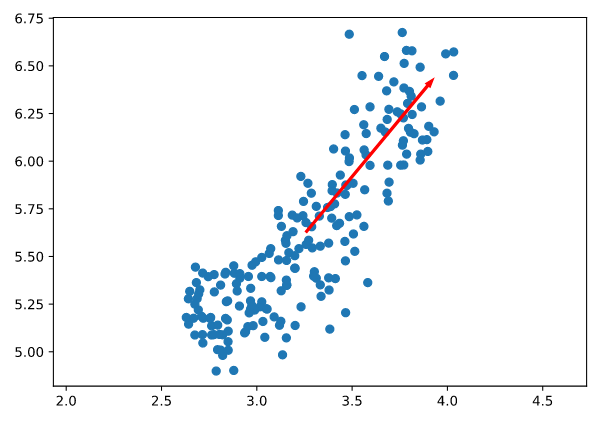

# Variance of the PCA features
The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

Instructions

1. Create an instance of StandardScaler called scaler.

2. Create a PCA instance called pca.

3. Use the make_pipeline() function to create a pipeline chaining scaler and pca.

4. Use the .fit() method of pipeline to fit it to the fish samples samples.

5. Extract the number of components used using the .n_components_ attribute of pca. Place this inside a range() function and store the result as features.

6. Use the plt.bar() function to plot the explained variances, with features on the x-axis and pca.explained_variance_ on the y-axis.

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

**Conclusion**

Great work! It looks like PCA features 0 and 1 have significant variance.

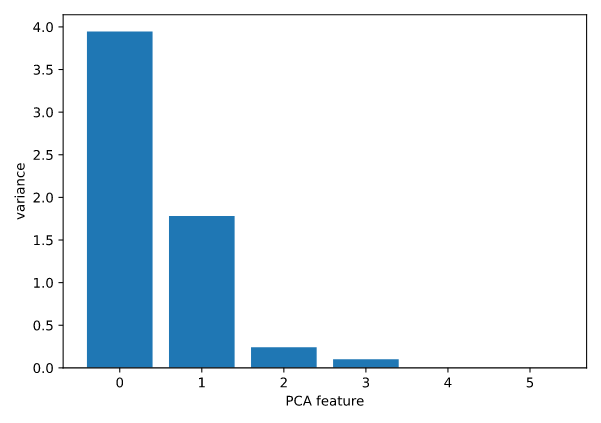

Intrinsic dimension of the fish data

In the previous exercise, you plotted the variance of the PCA features of the fish measurements. Looking again at your plot, what do you think would be a reasonable choice for the "intrinsic dimension" of the fish measurements? Recall that the intrinsic dimension is the number of PCA features with significant variance.

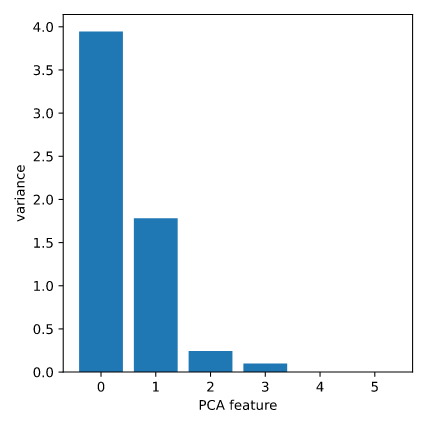

Wrong Answers
 - Incorrect Submission: PCA features 0 and 1 have significant variance

  - 1

  - 5

Correct Answer

- 2

Great job! Since PCA features 0 and 1 have significant variance, the intrinsic dimension of this dataset appears


# 1. Dimension reduction with PCA

2. Dimension reduction
Dimension reduction represents the same data using less features and is vital for building machine learning pipelines using real-world data. Finally, in this video, you'll learn how to perform dimension reduction using PCA.

3. Dimension reduction with PCA
We've seen already that the PCA features are in decreasing order of variance. PCA performs dimension reduction by discarding the PCA features with lower variance, which it assumes to be noise, and retaining the higher variance PCA features, which it assumes to be informative.

4. Dimension reduction with PCA
To use PCA for dimension reduction, you need to specify how many PCA features to keep. For example, specifying n_components=2 when creating a PCA model tells it to keep only the first two PCA features. A good choice is the intrinsic dimension of the dataset, if you know it. Let's consider an example right away.

5. Dimension reduction of iris dataset
The iris dataset has 4 features representing the 4 measurements. Here, the measurements are in a numpy array called samples. Let's use PCA to reduce the dimension of the iris dataset to only 2. Begin by importing PCA as usual. Create a PCA model specifying n_components=2, and then fit the model and transform the samples as usual. Printing the shape of the transformed samples, we see that there are only two features, as expected.

6. Iris dataset in 2 dimensions
Here is a scatterplot of the two PCA features, where the colors represent the three species of iris. Remarkably, despite having reduced the dimension from 4 to 2, the species can still be distinguished. Remember that PCA didn't even know that there were distinct species. PCA simply took the 2 PCA features with highest variance. As we can see, these two features are very informative.

7. Dimension reduction with PCA
PCA discards the low variance features, and assumes that the higher variance features are informative. Like all assumptions, there are cases where this doesn't hold. As we saw with the iris dataset, however, it often does in practice.

8. Word frequency arrays
In some cases, an alternative implementation of PCA needs to be used. Word frequency arrays are a great example. In a word-frequency array, each row corresponds to a document, and each column corresponds to a word from a fixed vocabulary. The entries of the word-frequency array measure how often each word appears in each document. Only some of the words from the vocabulary appear in any one document, so most entries of the word frequency array are zero.

9. Sparse arrays and csr_matrix
Arrays like this are said to be "sparse", and are often represented using a special type of array called a "csr_matrix". csr_matrices save space by remembering only the non-zero entries of the array.

10. TruncatedSVD and csr_matrix
Scikit-learn's PCA doesn't support csr_matrices, and you'll need to use TruncatedSVD instead. TruncatedSVD performs the same transformation as PCA, but accepts csr matrices as input. Other than that, you interact with TruncatedSVD and PCA in exactly the same way.

11. Let's practice!
In this video, you've learned how to perform dimension reduction using PCA. Now it's time to practice dimension reduction in the wild!

# Dimension reduction of the fish measurements
In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

The fish measurements have already been scaled for you, and are available as scaled_samples.

Instructions

1. Import PCA from sklearn.decomposition.

2. Create a PCA instance called pca with n_components=2.

3. Use the .fit() method of pca to fit it to the scaled fish measurements scaled_samples.

4. Use the .transform() method of pca to transform the scaled_samples. Assign the result to pca_features.

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

'''
<script.py> output:
    (85, 2)

Conclusion: Superb! You've successfully reduced the dimensionality from 6 to 2.
'''

# A tf-idf word-frequency array

In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

You are given a list documents of toy documents about pets. Its contents have been printed in the IPython Shell.

Instructions

1. Import TfidfVectorizer from sklearn.feature_extraction.text.

2. Create a TfidfVectorizer instance called tfidf.

3. Apply .fit_transform() method of tfidf to documents and assign the result to csr_mat. This is a word-frequency array in csr_matrix format.

4. Inspect csr_mat by calling its .toarray() method and printing the result. This has been done for you.

5. The columns of the array correspond to words. Get the list of words by calling the .get_feature_names() method of tfidf, and assign the result to words.

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

'''
<script.py> output:
    [[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
     [0.         0.         0.51785612 0.         0.51785612 0.68091856]
     [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
    ['cats', 'chase', 'dogs', 'meow', 'say', 'woof']

Conclusion: Great work! You'll now move to clustering Wikipedia articles!
'''

# Clustering Wikipedia part I

You saw in the video that TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer).

The Wikipedia dataset you will be working with was obtained from here.

Instructions

1. Import:

 - TruncatedSVD from sklearn.decomposition.
 - KMeans from sklearn.cluster.
 - make_pipeline from sklearn.pipeline.

2. Create a TruncatedSVD instance called svd with n_components=50.

3. Create a KMeans instance called kmeans with n_clusters=6.

4. Create a pipeline called pipeline consisting of svd and kmeans.

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

'''
Conclusion: Excellent! Now that you have set up your pipeline, 
you will use it in the next exercise to cluster the articles.
'''

# Clustering Wikipedia part II

It is now time to put your pipeline from the previous exercise to work! You are given an array articles of tf-idf word-frequencies of some popular Wikipedia articles, and a list titles of their titles. Use your pipeline to cluster the Wikipedia articles.

A solution to the previous exercise has been pre-loaded for you, so a Pipeline pipeline chaining TruncatedSVD with KMeans is available.

Instructions

1. Import pandas as pd.

2. Fit the pipeline to the word-frequency array articles.

3. Predict the cluster labels.

4. Align the cluster labels with the list titles of article titles by creating a DataFrame df with labels and titles as columns. This has been done for you.

5. Use the .sort_values() method of df to sort the DataFrame by the 'label' column, and print the result.

6. Hit 'Submit Answer' and take a moment to investigate your amazing clustering of Wikipedia pages!

In [ ]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

'''
<script.py> output:
        label                                        article
    59      0                                    Adam Levine
    57      0                          Red Hot Chili Peppers
    56      0                                       Skrillex
    55      0                                  Black Sabbath
    54      0                                 Arctic Monkeys
    53      0                                   Stevie Nicks
    52      0                                     The Wanted
    51      0                                     Nate Ruess
    50      0                                   Chad Kroeger
    58      0                                         Sepsis
    30      1                  France national football team
    31      1                              Cristiano Ronaldo
    32      1                                   Arsenal F.C.
    33      1                                 Radamel Falcao
    37      1                                       Football
    35      1                Colombia national football team
    36      1              2014 FIFA World Cup qualification
    38      1                                         Neymar
    39      1                                  Franck Ribéry
    34      1                             Zlatan Ibrahimović
    26      2                                     Mila Kunis
    28      2                                  Anne Hathaway
    27      2                                 Dakota Fanning
    25      2                                  Russell Crowe
    29      2                               Jennifer Aniston
    23      2                           Catherine Zeta-Jones
    22      2                              Denzel Washington
    21      2                             Michael Fassbender
    20      2                                 Angelina Jolie
    24      2                                   Jessica Biel
    10      3                                 Global warming
    11      3       Nationally Appropriate Mitigation Action
    13      3                               Connie Hedegaard
    14      3                                 Climate change
    12      3                                   Nigel Lawson
    16      3                                        350.org
    17      3  Greenhouse gas emissions by the United States
    18      3  2010 United Nations Climate Change Conference
    19      3  2007 United Nations Climate Change Conference
    15      3                                 Kyoto Protocol
    8       4                                        Firefox
    1       4                                 Alexa Internet
    2       4                              Internet Explorer
    3       4                                    HTTP cookie
    4       4                                  Google Search
    5       4                                         Tumblr
    6       4                    Hypertext Transfer Protocol
    7       4                                  Social search
    49      4                                       Lymphoma
    42      4                                    Doxycycline
    47      4                                          Fever
    46      4                                     Prednisone
    44      4                                           Gout
    43      4                                       Leukemia
    9       4                                       LinkedIn
    48      4                                     Gabapentin
    0       4                                       HTTP 404
    45      5                                    Hepatitis C
    41      5                                    Hepatitis B
    40      5                                    Tonsillitis
'''

'''
Conclusion: 

Fantastic! Take a look at the cluster labels and see if you can identify any patterns!
'''